In [4]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [20]:
songs_original_df_v2 = pd.read_csv('spotify_5000_songs')

songs_original_df_v2.drop(columns=['Unnamed: 0'], inplace=True)
songs_original_df_v2.head()
songs_original_df_v2.columns = songs_original_df_v2.columns.str.strip()
songs_original_df_v2['name'] = songs_original_df_v2['name'].str.rstrip(' .')
songs_original_df_v2['name'] = songs_original_df_v2['name'].str.split().str[:2].str.join(' ') #shorten the song's name

songs_original_df_v2.set_index('name', inplace=True)
to_drop = ['artist', 'html', 'id', 'time_signature', 'duration_ms', 'mode','key', 'type']
df_songs = songs_original_df_v2.drop(columns=to_drop)
df_songs

FileNotFoundError: [Errno 2] No such file or directory: 'spotify_5000_songs'

In [24]:
url = "https://drive.google.com/file/d/14lAUTC1gjCh93ZD-BqDjjdaYtFAIzfvv/view?usp=sharing" # spotify list
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
songs_original_df = pd.read_csv('spotify_5000_songs.csv',
                               on_bad_lines='skip')
#songs_original_df.columns = songs_original_df.columns.str.replace(' ', '')

songs_original_df.columns = songs_original_df.columns.str.strip()
songs_original_df['name'] = songs_original_df['name'].str.rstrip(' .')

#to_drop=['index__']

#songs_original_df = songs_original_df.drop(columns=to_drop)  
songs_original_df = songs_original_df.drop_duplicates()


to_drop=[ 'key',
          'mode',
          'type',
          'duration_ms',
          'time_signature',
          'id',
          'html;',
          'artist'
         ]
#songs_original_df = songs_original_df.drop(columns=to_drop)  
#songs_original_df= songs_original_df.set_index(['name'])




songs_original_df #= songs_orignal_df.head(50)

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,0,Se Eu Quiser Falar Com Deus,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,1,Saudade De Bahia,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,2,"Canta Canta, Minha Gente",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,3,Mulher Eu Sei,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,4,Rosa Morena,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


In [114]:
songs_original_df.duplicated().sum()

10

In [115]:
songs_original_df = songs_original_df.drop_duplicates()

Min_Max_Scaler

In [116]:
songs = songs_original_df.copy()
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler().set_output(transform="pandas")

# Use the transformer to transform the data
min_max_df = my_min_max.fit_transform(songs)
min_max_scaled_df = min_max_df.copy()
# [['danceability','energy','loudness','acousticness','instrumentalness']]

Distance DF plot

In [117]:
'''
min_max_songs_distance = pd.DataFrame(pairwise_distances(min_max_df),
                                   index=songs_orignal_df.index,
                                   columns=songs_orignal_df.index)

# Create a figure with a size of 12 inches by 8 inches
plt.subplots(figsize=(12, 8))

# Generate a heatmap of the Euclidean distances DataFrame
sns.heatmap(min_max_songs_distance);
'''

'\nmin_max_songs_distance = pd.DataFrame(pairwise_distances(min_max_df),\n                                   index=songs_orignal_df.index,\n                                   columns=songs_orignal_df.index)\n\n# Create a figure with a size of 12 inches by 8 inches\nplt.subplots(figsize=(12, 8))\n\n# Generate a heatmap of the Euclidean distances DataFrame\nsns.heatmap(min_max_songs_distance);\n'

KMEANS

In [118]:
my_kmeans = KMeans(n_clusters= 50, # you always choose the number of k here
                   n_init = "auto",
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(min_max_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our original DataFrame
min_max_df["playlist"] = clusters

#min_max_df.loc[min_max_df['playlist']==7,:]
min_max_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist
name,,,,,,,,,,
Se Eu Quiser Falar Com Deus,0.680455,0.2590,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,34
Saudade De Bahia,0.767322,0.3990,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,21
Mulher Eu Sei,0.729059,0.0502,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,48
Rosa Morena,0.673216,0.1190,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,48
Desafinado,0.481903,0.1460,0.692837,0.070697,0.934739,0.156345,0.108409,0.429442,0.667718,48
...,...,...,...,...,...,...,...,...,...,...
EXPO,0.070631,0.2070,0.622282,0.053268,0.890562,0.942132,0.772036,0.038477,0.272625,11
Symphony No. 1: I. Presto,0.096381,0.0750,0.578299,0.038562,0.931727,0.630457,0.065046,0.036041,0.400360,11
Gruppen für drei Orchester - Werk Nr. 6,0.328852,0.1220,0.606143,0.069063,0.884538,0.017868,0.124620,0.120812,0.481775,45


In [119]:
#min_max_df.groupby(by="playlist").mean()

In [120]:
centroids = my_kmeans.cluster_centers_
centroids_df=pd.DataFrame(centroids)
centroids_df

,0,1,2,3,4,5,6,7,8
0,0.274033,0.935933,0.853558,0.120145,0.013995,0.836362,0.483452,0.165787,0.634312
1,0.574539,0.836601,0.892599,0.068414,0.054976,0.014991,0.117890,0.453191,0.556204
2,0.435212,0.195795,0.672033,0.049733,0.832631,0.460051,0.152487,0.190609,0.669374
3,0.756803,0.530714,0.807344,0.063699,0.225778,0.008815,0.106011,0.909384,0.535702
4,0.225386,0.138659,0.618039,0.046358,0.941767,0.901523,0.136688,0.117922,0.707482
5,0.577486,0.406330,0.822435,0.051338,0.544982,0.017724,0.134213,0.295255,0.512792
6,0.283351,0.954855,0.870620,0.154811,0.003736,0.062519,0.120122,0.161712,0.522081
7,0.240289,0.942203,0.847916,0.141051,0.005397,0.850781,0.154097,0.118223,0.480011
8,0.743625,0.847398,0.889391,0.073907,0.071545,0.013768,0.096670,0.870270,0.550615
9,0.560542,0.729603,0.856615,0.093062,0.603798,0.025891,0.172866,0.843162,0.775290


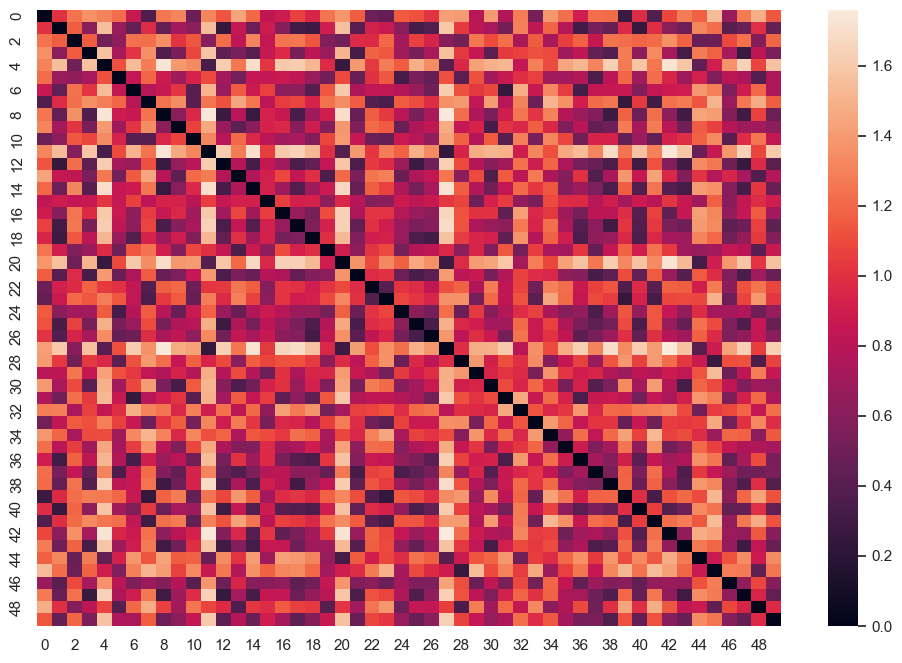

In [121]:

centroids_df_dist = pd.DataFrame(pairwise_distances(centroids_df))

# Create a figure with a size of 12 inches by 8 inches
plt.subplots(figsize=(12, 8))

# Generate a heatmap of the Euclidean distances DataFrame
sns.heatmap(centroids_df_dist);

In [122]:
min_max_df.groupby('playlist')['danceability'].count()

playlist
0      60
1     183
2      20
3     105
4      64
5      91
6     193
7     207
8     176
9      68
10    132
11    105
12    208
13    115
14    133
15     29
16     55
17    112
18    138
19     30
20    101
21    122
22     45
23    113
24     72
25    141
26    126
27     88
28     61
29     56
30     82
31     98
32     23
33     61
34     18
35     49
36     99
37     99
38     90
39    100
40    149
41    125
42     54
43    123
44     63
45     75
46     62
47    157
48    139
49     53
Name: danceability, dtype: int64

In [123]:
#min_max_df.loc[min_max_df['playlist']==5,:]

In [126]:
dict1 = []
k_min = 20
k_max = 100
seed = 234
for k in range(k_min,k_max):
    my_kmeans3 = KMeans(n_clusters= k, # you always choose the number of k here
                    n_init = "auto",
                    random_state = seed)
    # Fit the model to the data
    my_kmeans3.fit(min_max_df)
    dict1.append(silhouette_score(min_max_df, my_kmeans3.labels_))

dict1

[0.539835068695836,
 0.5507412127883861,
 0.5559401137367349,
 0.5655546275424564,
 0.5785335079534124,
 0.5835781709046789,
 0.5948606338589579,
 0.6051446183705507,
 0.60848575798602,
 0.6250518549398808,
 0.6211687788229963,
 0.6325124101825277,
 0.6326732946358755,
 0.6410599763530052,
 0.6469863078257764,
 0.6517855856576034,
 0.653442767045123,
 0.6615698407648931,
 0.6660980239514057,
 0.6815792645958126,
 0.6884719271337799,
 0.6899473050288542,
 0.7002491560964075,
 0.7083488458019448,
 0.7162632591620393,
 0.7189490461380433,
 0.7249126940235955,
 0.7301307819712163,
 0.7383070432353399,
 0.7103498489253193,
 0.6949945631918373,
 0.7000460805701798,
 0.7021306274736231,
 0.6855429048512387,
 0.6798733591227828,
 0.6889126701319361,
 0.6750520168614017,
 0.6588910289859488,
 0.6485351478620514,
 0.648679049871478,
 0.6322339913565568,
 0.6048873421860392,
 0.5988102321731088,
 0.5931012160991062,
 0.5761341600844126,
 0.5711621804487333,
 0.5532184701653674,
 0.552997930869756

/Users/phive/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/phive/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


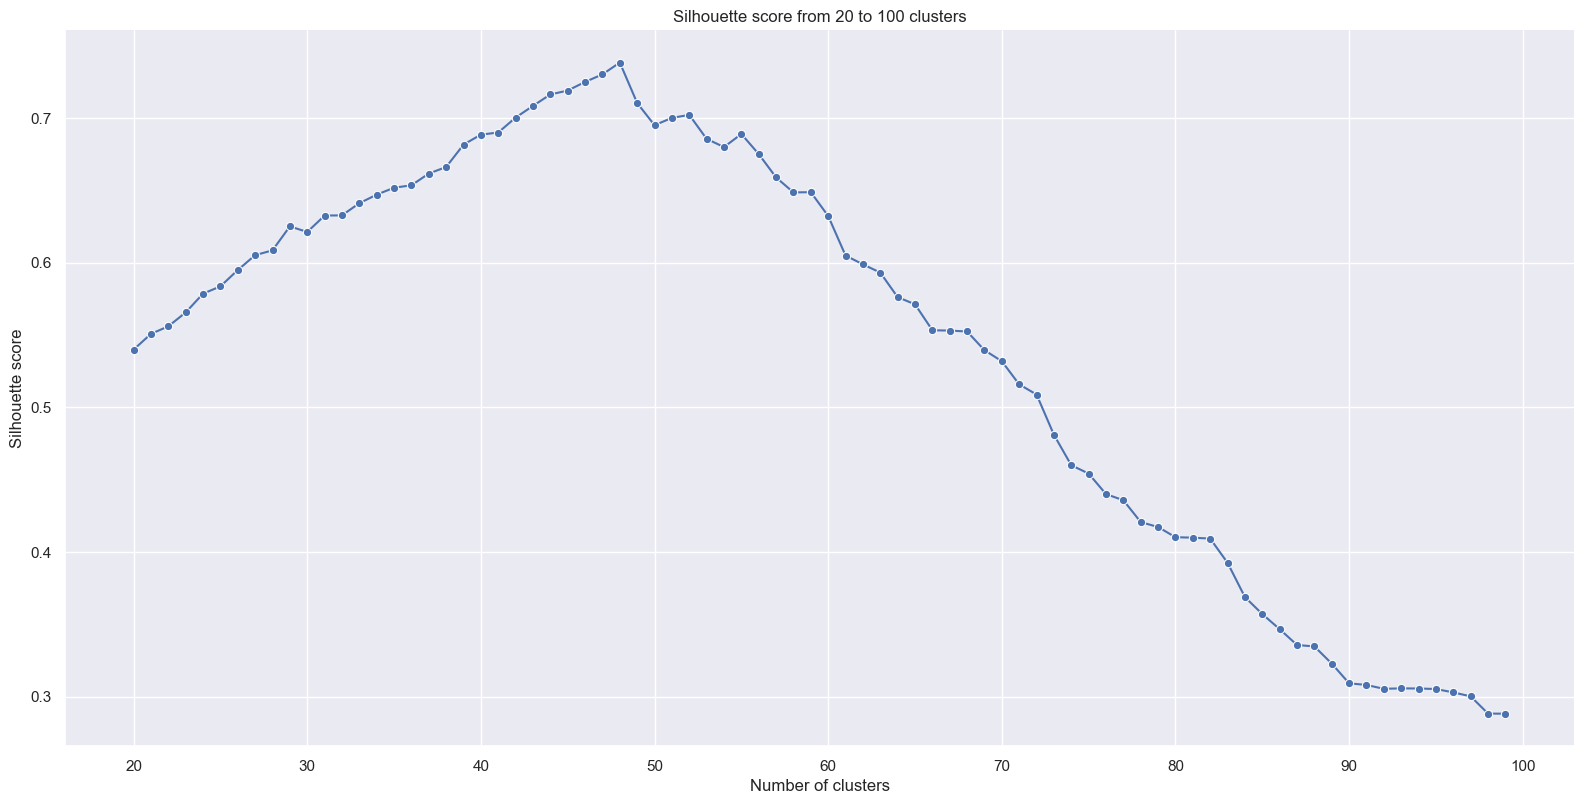

In [127]:
sns.set_theme(style='darkgrid')
(
sns.relplot(y=dict1,
            x=range(k_min,k_max),
            kind='line',
            marker='o',
            height = 8,
            aspect=2)
.set(title=f"Silhouette score from {k_min} to {k_max} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
)

In [128]:
min_max_scaled_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,,,,,,,,,
Se Eu Quiser Falar Com Deus,0.680455,0.2590,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
Saudade De Bahia,0.767322,0.3990,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
Mulher Eu Sei,0.729059,0.0502,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098
Rosa Morena,0.673216,0.1190,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171
Desafinado,0.481903,0.1460,0.692837,0.070697,0.934739,0.156345,0.108409,0.429442,0.667718
...,...,...,...,...,...,...,...,...,...
EXPO,0.070631,0.2070,0.622282,0.053268,0.890562,0.942132,0.772036,0.038477,0.272625
Symphony No. 1: I. Presto,0.096381,0.0750,0.578299,0.038562,0.931727,0.630457,0.065046,0.036041,0.400360
Gruppen für drei Orchester - Werk Nr. 6,0.328852,0.1220,0.606143,0.069063,0.884538,0.017868,0.124620,0.120812,0.481775


In [129]:
dict2 = []

for k in range(k_min,k_max):
    my_kmeans2 = KMeans(n_clusters= k, # you always choose the number of k here
                    n_init = "auto",
                    random_state = seed)
    
    # Fit the model to the data
    my_kmeans2.fit(min_max_scaled_df)
    dict2.append(silhouette_score(min_max_scaled_df, my_kmeans2.labels_))



/Users/phive/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/phive/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


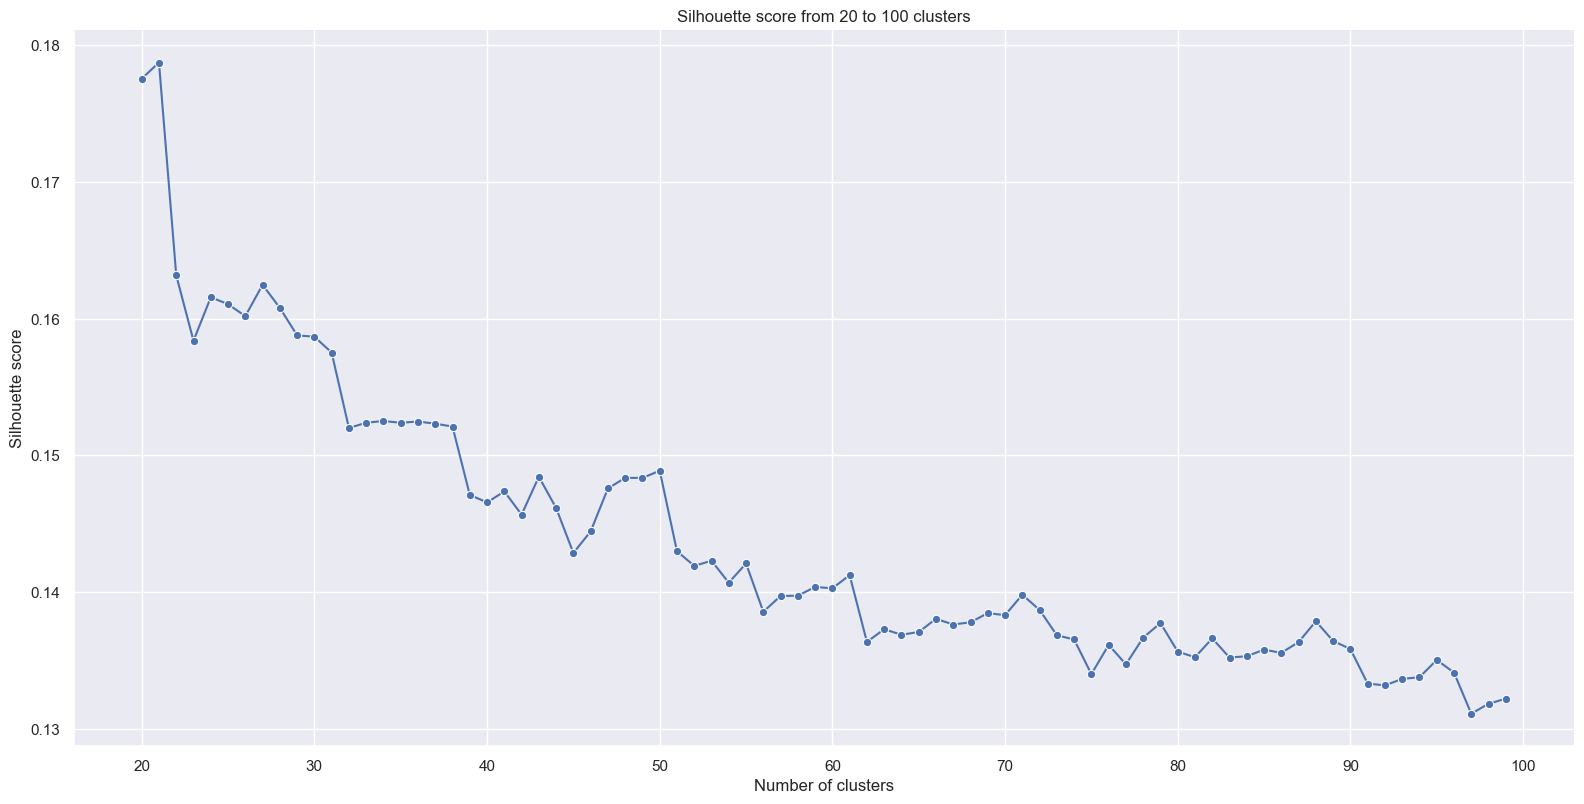

In [137]:
sns.set_theme(style='darkgrid')
(
sns.relplot(y=dict2,
            x=range(k_min,k_max),
            kind='line',
            marker='o',
            height = 8,
            aspect=2)
.set(title=f"Silhouette score from {k_min} to {k_max} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
)

Inertia and elbow method

In [139]:

inertia_list = [] # empty list to append via loop

for i in range(2, k_max):
    myKMeans12 = KMeans(n_clusters = i,
                      n_init='auto',
                      random_state=seed)
    myKMeans12.fit(min_max_scaled_df)
    inertia_list.append(myKMeans12.inertia_)

inertia_list

[1694.6446068187531,
 1151.6407032333636,
 949.0231243784028,
 746.2023895640534,
 695.6394760659484,
 674.5891130720437,
 611.5973752187739,
 591.0625750600801,
 575.6166801737168,
 547.119249316496,
 538.2045523827517,
 518.0438161542959,
 498.0405922663965,
 483.7746554772273,
 470.4593333115596,
 459.41805502915287,
 450.1099005318624,
 445.257615192497,
 435.42486105519913,
 428.1581240748062,
 419.47802478904896,
 415.53700843256513,
 407.02737042734486,
 401.8424864074395,
 394.4027835446367,
 387.53088029456364,
 384.5108391267859,
 381.1762288100208,
 375.4296578668054,
 370.5555947065526,
 367.1953646744289,
 363.0408883854826,
 356.8137996173647,
 353.0098428688777,
 350.05582770922126,
 347.4886078371704,
 344.8792763102965,
 342.2035052308237,
 337.7834137761704,
 332.4613744079274,
 330.7593586426889,
 327.5675000963089,
 324.9144041618745,
 322.80606910723003,
 319.18555971015473,
 317.1950281372867,
 313.37006976805503,
 311.0532943776654,
 308.89553011435913,
 306.6219

plot it

/Users/phive/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/phive/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


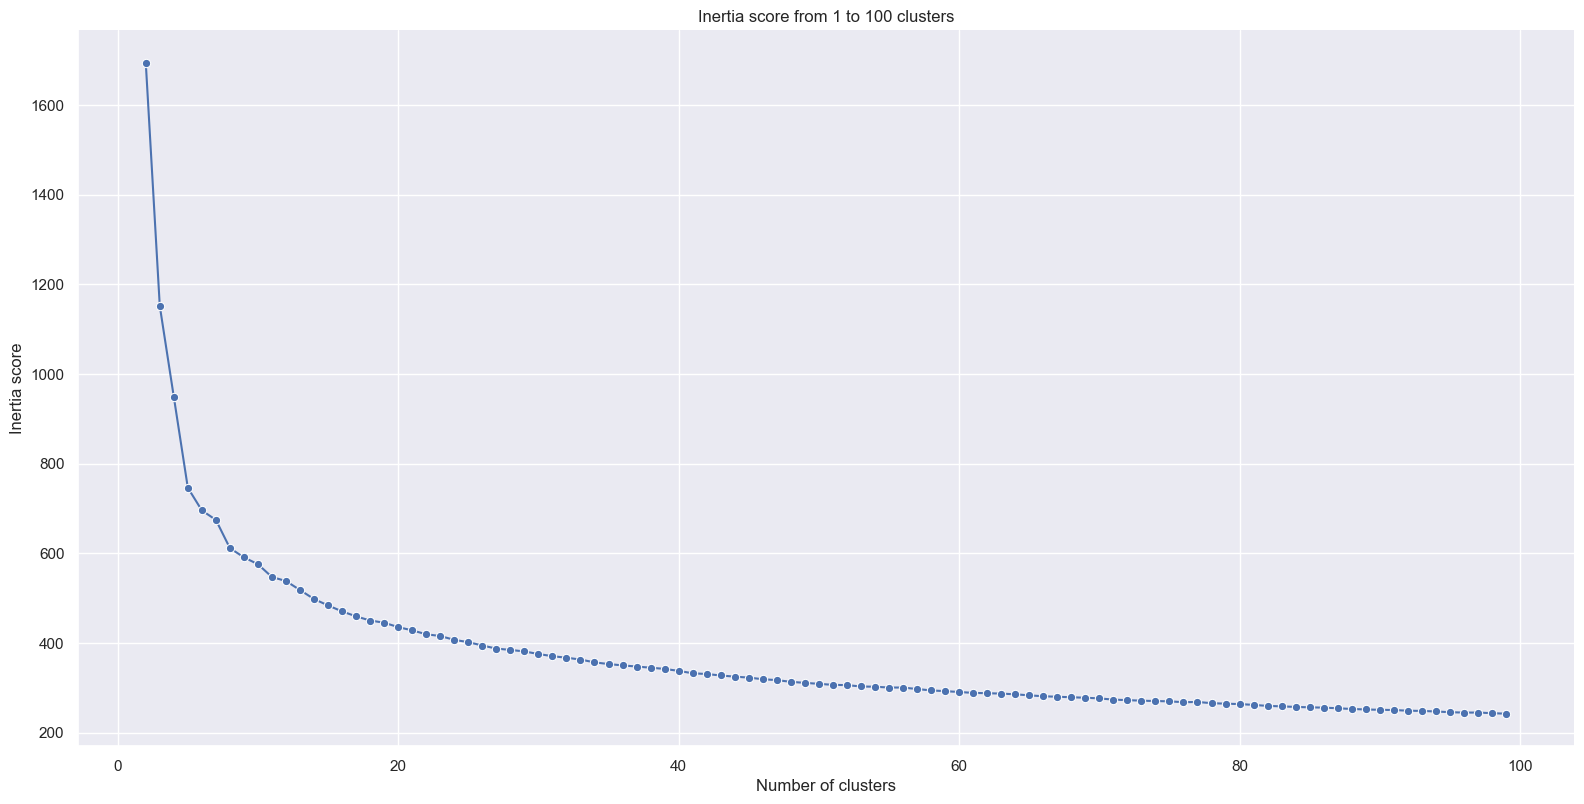

In [140]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(2,k_max),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {k_max} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
)